In [1]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from transformers import pipeline

from utils import config, utils

In [2]:
df, df_cv = utils.Utils.load_data(drop_neutral=False)

In [3]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use cpu


In [4]:
y_pred = []

for idx, row in tqdm.tqdm(df.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df["y_pred"] = y_pred

Predicting sentiment: 18543it [16:31, 18.70it/s]


In [5]:
df.head()

,date,source,subject,text,title,label,polarity,subjectivity,y_pred
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20,"{'label': 'neutral', 'score': 0.8916722536087036}"
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00,"{'label': 'negative', 'score': 0.6789504289627..."
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31,"{'label': 'positive', 'score': 0.8841078281402..."
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23,"{'label': 'positive', 'score': 0.9310047626495..."
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40,"{'label': 'neutral', 'score': 0.8379234075546265}"


In [6]:
df["pred_sentiment"] = df["y_pred"].apply(lambda x: x["label"])
df["pred_sentiment"] = df["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df.head(35)

,date,source,subject,text,title,label,polarity,subjectivity,y_pred,pred_sentiment
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20,"{'label': 'neutral', 'score': 0.8916722536087036}",neutral
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00,"{'label': 'negative', 'score': 0.6789504289627...",negative
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31,"{'label': 'positive', 'score': 0.8841078281402...",positive
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23,"{'label': 'positive', 'score': 0.9310047626495...",positive
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40,"{'label': 'neutral', 'score': 0.8379234075546265}",neutral
5,2023-04-04 23:47:00,CryptoNews,bitcoin,As concerns about a regulatory crackdown in th...,"Investors Continue Buying Bitcoin, Latest Fund...",neutral,0.00,0.00,"{'label': 'negative', 'score': 0.9375510811805...",negative
6,2023-04-04 22:30:00,CryptoNews,altcoin,Amid concerns of a potential recession due to ...,"Best Crypto to Buy Now 4 April \x93 SXP, SHIB,...",positive,0.27,0.47,"{'label': 'negative', 'score': 0.6637031435966...",negative
7,2023-04-04 21:51:00,CryptoPotato,bitcoin,Marathon produced almost 40% of its Q1 bitcoin...,Marathon Digital Announces a Record Bitcoin Pr...,neutral,0.00,0.00,"{'label': 'neutral', 'score': 0.6849266886711121}",neutral
8,2023-04-04 21:47:11,CoinTelegraph,ethereum,The token protocol can be used for a wide vari...,Masa announces soulbound ID tokens for Coinbas...,negative,-0.10,0.40,"{'label': 'neutral', 'score': 0.9421625137329102}",neutral
9,2023-04-04 20:45:22,CoinTelegraph,nft,The launch of OpenSea Pro is the result of Ope...,OpenSea launches advanced NFT marketplace aggr...,neutral,0.00,0.00,"{'label': 'neutral', 'score': 0.9169034957885742}",neutral


[[0.46057441 0.35039164 0.18903394]
 [0.24949353 0.52470002 0.22580645]
 [0.22504822 0.46733365 0.30761813]]


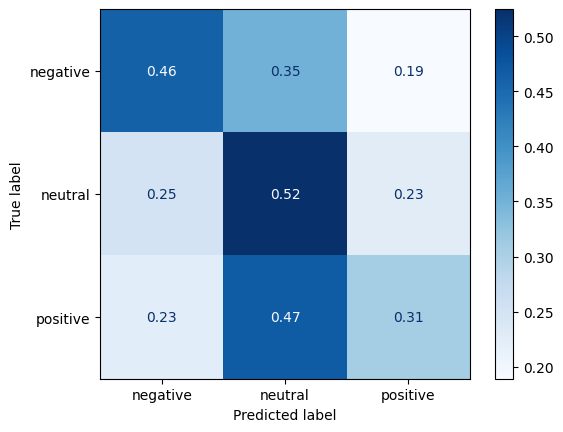

In [7]:
cm = confusion_matrix(df["label"], df["pred_sentiment"], labels=config.SENTIMENTS, normalize="true")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=config.SENTIMENTS)
disp.plot(cmap=plt.cm.Blues)

In [8]:
print("Classification Report - Validation set\n", classification_report(df["label"], df["pred_sentiment"]))

Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.34      0.46      0.39      3830
     neutral       0.39      0.52      0.45      6417
    positive       0.54      0.31      0.39      8296

    accuracy                           0.41     18543
   macro avg       0.42      0.43      0.41     18543
weighted avg       0.45      0.41      0.41     18543



# FEIN BERT Active Learning

In [9]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [10]:
df_all, df_cv = utils.Utils.load_data()
# df_all = df_all.sample(n=5000, random_state=config.RANDOM_STATE)
df_all = df_all[:100000]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18543 entries, 0 to 18542
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          18543 non-null  object 
 1   source        18543 non-null  object 
 2   subject       18543 non-null  object 
 3   text          18543 non-null  object 
 4   title         18543 non-null  object 
 5   label         18543 non-null  object 
 6   polarity      18543 non-null  float64
 7   subjectivity  18543 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


In [11]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use cpu


In [12]:
y_pred = []

for idx, row in tqdm.tqdm(df_all.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df_all["y_pred"] = y_pred

Predicting sentiment: 18543it [15:52, 19.47it/s]


In [13]:
df_all["pred_sentiment"] = df_all["y_pred"].apply(lambda x: x["label"])
df_all["label"] = df_all["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df_all.tail()

,date,source,subject,text,title,label,polarity,subjectivity,y_pred,pred_sentiment
18538,2021-10-27 15:17:00,CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,negative,0.00,0.00,"{'label': 'negative', 'score': 0.9658128619194...",negative
18539,2021-10-19 13:39:00,CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,neutral,0.10,0.40,"{'label': 'neutral', 'score': 0.7641550898551941}",neutral
18540,2021-10-18 13:58:00,CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",positive,0.14,0.45,"{'label': 'positive', 'score': 0.8739755749702...",positive
18541,2021-10-15 00:00:00,CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,positive,0.00,0.00,"{'label': 'positive', 'score': 0.9210928082466...",positive
18542,2021-10-12 20:00:00,CryptoNews,blockchain,"Within a little more than a year, Celo aims to...","Celo to Be Fastest EVM Chain by End of 2022, C...",positive,0.16,0.50,"{'label': 'positive', 'score': 0.8690372705459...",positive


In [14]:
df_all.to_csv(r"../res/prepared/ieee_AL_50.csv", index=False)